In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

dataset = datasets.load_linnerud()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [2]:
print(dataset.keys())

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [3]:
df.columns

Index(['Chins', 'Situps', 'Jumps'], dtype='object')

In [4]:
df.shape

(20, 3)

In [5]:
df_target = dataset.target
df_target

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

In [6]:
df['label'] = dataset.target[:,1]

In [7]:
df

,Chins,Situps,Jumps,label
0,5.0,162.0,60.0,36.0
1,2.0,110.0,60.0,37.0
2,12.0,101.0,101.0,38.0
3,12.0,105.0,37.0,35.0
4,13.0,155.0,58.0,35.0
5,4.0,101.0,42.0,36.0
6,8.0,101.0,38.0,38.0
7,6.0,125.0,40.0,34.0
8,15.0,200.0,40.0,31.0
9,17.0,251.0,250.0,33.0


In [8]:
X = df.iloc[:,0:3].values
y = df.iloc[:,3].values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [9]:
X

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [10]:
y

array([36., 37., 38., 35., 35., 36., 38., 34., 31., 33., 34., 33., 34.,
       46., 36., 37., 37., 32., 33., 33.])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation = 'elu', input_shape = (3,)))
model.add(Dense(64, activation = 'elu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mae', metrics = ['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               512       
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [25]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 601ms/step - loss: 24.3663 - mae: 24.3663 - val_loss: 10.0861 - val_mae: 10.0861
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 16.0615 - mae: 16.0615 - val_loss: 11.4805 - val_mae: 11.4805
Epoch 3/100
1/1 [==============================] - 0s 44ms/step - loss: 14.8660 - mae: 14.8660 - val_loss: 13.3033 - val_mae: 13.3033
Epoch 4/100
1/1 [==============================] - 0s 41ms/step - loss: 13.6375 - mae: 13.6375 - val_loss: 13.2545 - val_mae: 13.2545
Epoch 5/100
1/1 [==============================] - 0s 48ms/step - loss: 12.7680 - mae: 12.7680 - val_loss: 14.2248 - val_mae: 14.2248
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 12.0952 - mae: 12.0952 - val_loss: 11.8153 - val_mae: 11.8153
Epoch 7/100
1/1 [==============================] - 0s 50ms/step - loss: 15.0831 - mae: 15.0831 - val_loss: 16.4528 - val_mae: 16.4528
Epoch 8/100
1/1 [==============================] - 0s 44ms/st

In [26]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 25ms/step - loss: 8.6877 - mae: 8.6877


[8.687650680541992, 8.687650680541992]

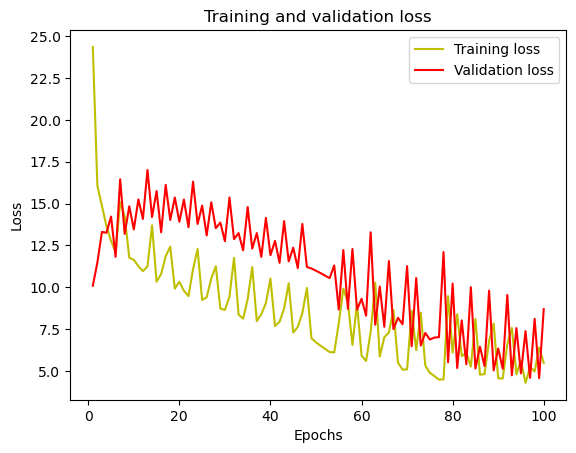

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

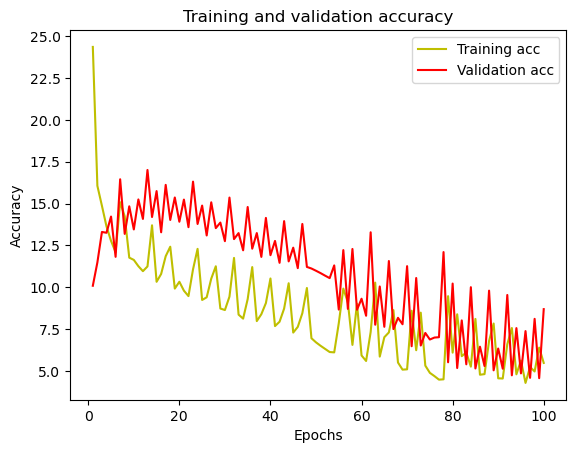

In [29]:
acc =history.history['mae']
val_acc =history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()